# IKEA Business Case

**Overview:**

The analysis identifies opportunities to enhance sales performance, boost customer retention, and drive revenue growth. Key areas include customer behavior, product performance, pricing strategies, loyalty program effectiveness, and demographic trends. This presentation outlines actionable recommendations tailored to varying customer segments and city tiers.

### Requirements

**1. Customer Segmentation**
- Who are the primary customer groups driving sales, and how do their preferences vary by city tier?

**2. Product Performance**
- Which product categories perform best in different city tiers?

**3. Loyalty Program Effectiveness**
- How does customer loyalty status impact sales contributions?

**4. Demographic Trends**
- What are the purchasing patterns of different age and gender groups?

**5. Dynamic Pricing**
- How do pricing changes affect sales performance across city tiers?

**6. Customer Retention and Churn**
- What distinguishes retained customers from those who churn, and how can churn be reduced?

**7. Revenue Optimization**
- What are the primary factors driving IKEA's revenue growth?

In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
file_path = '/Users/kailash/Downloads/ikea_dataset_2023.csv'
ikea_data = pd.read_csv(file_path)

In [3]:
# Convert necessary columns to appropriate data types
ikea_data['Transaction_Date'] = pd.to_datetime(ikea_data['Transaction_Date'])
ikea_data['Customer_Age'] = pd.to_numeric(ikea_data['Customer_Age'], errors='coerce')
ikea_data['Unit_Price'] = pd.to_numeric(ikea_data['Unit_Price'], errors='coerce')
ikea_data['Total_Sales'] = pd.to_numeric(ikea_data['Total_Sales'], errors='coerce')

/var/folders/9x/494q9ll53g70pr6xkvxydgyh0000gn/T/ipykernel_63431/1876774297.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ikea_data['Transaction_Date'] = pd.to_datetime(ikea_data['Transaction_Date'])


## 1. Customer Segmentation Analysis

**Question:** Who are the primary customer groups driving sales, and how do their preferences vary by city tier?

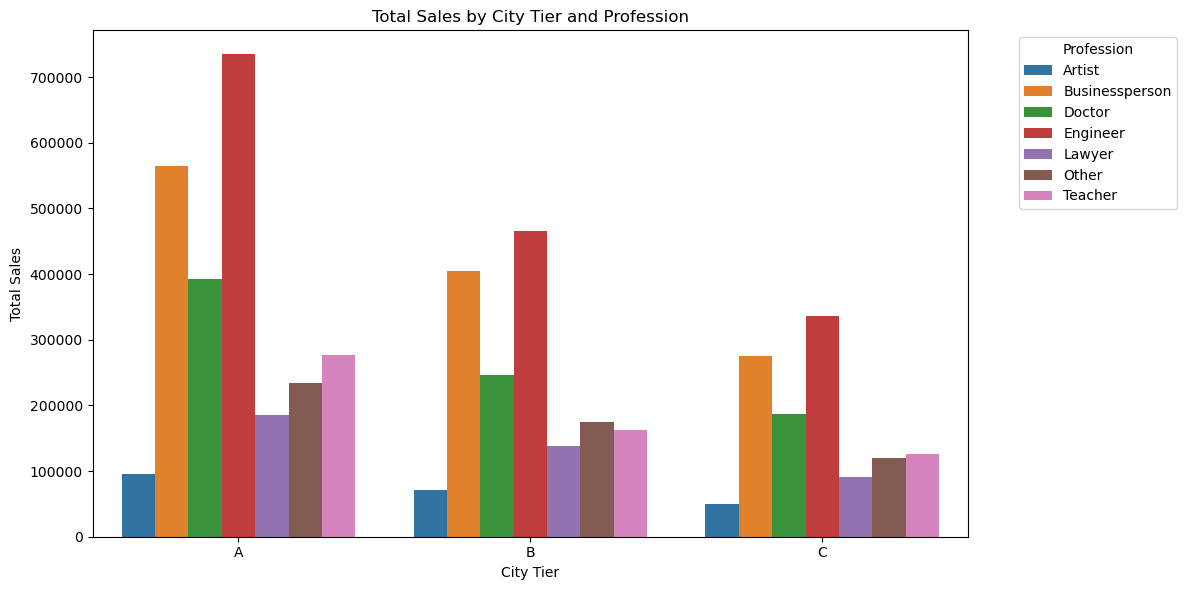

In [38]:
# Customer segmentation based on city and profession
segmentation = ikea_data.groupby(['City_Tier', 'Customer_Profession'])['Total_Sales'].agg(['mean', 'sum']).reset_index()

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=segmentation, x='City_Tier', y='sum', hue='Customer_Profession')
plt.title('Total Sales by City Tier and Profession')
plt.xlabel('City Tier')
plt.ylabel('Total Sales')
plt.legend(title='Profession', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Observations:**
- Engineers are dominating total sales in all cities
- Teachers are spend higher in top tier cities compared to lower tiers.
- People in lower tier cities are spending less compare to top tiers.

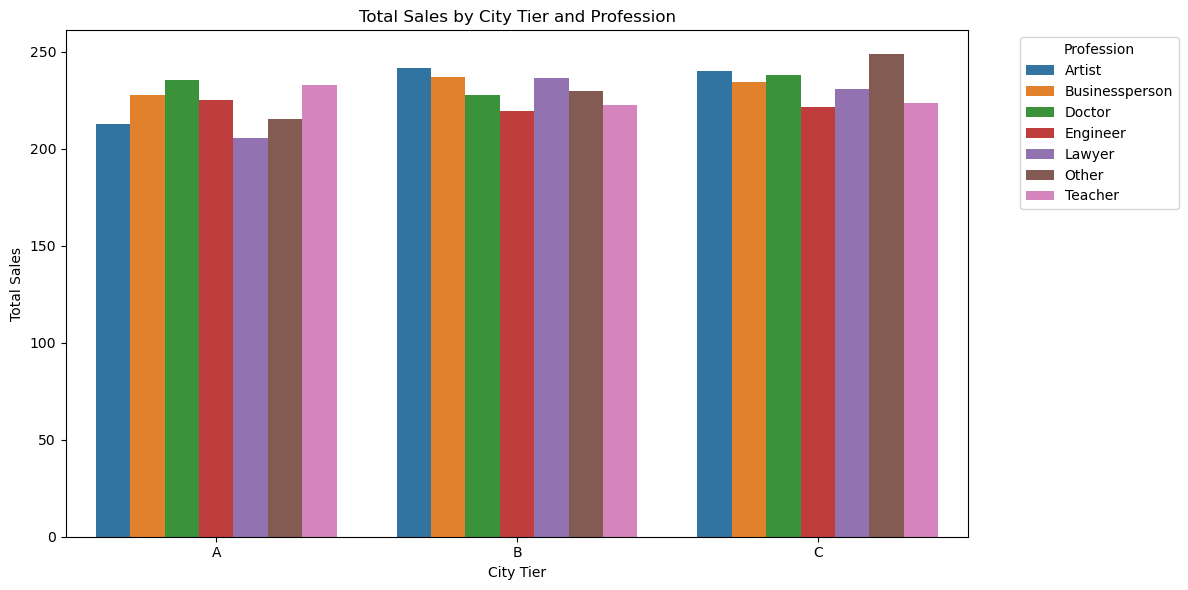

In [39]:
# Customer segmentation based on city and profession
segmentation = ikea_data.groupby(['City_Tier', 'Customer_Profession'])['Total_Sales'].agg(['mean', 'sum']).reset_index()

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=segmentation, x='City_Tier', y='mean', hue='Customer_Profession')
plt.title('Total Sales by City Tier and Profession')
plt.xlabel('City Tier')
plt.ylabel('Total Sales')
plt.legend(title='Profession', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Observations:**
- Interestingly even though Engineers are toping the total sale value, on average they are one of the low spending professions.
- On average doctors and teachers followed by business people are spending more in top tier cities.
- Artists average spending in tier B and C cities is more compared to tier 1 cities.
- Artists are dominating the average sales in tier B followed by business people and Lawyers.
- Average spending of Lawyers in tier B cities is high compared to other tiers.
- Manufacturing and other professions toping the average sales in tier C cities. Which is higher compared to other tiers.

## 2. Product Performance Analysis

**Question:** Which product categories perform best in different city tiers?

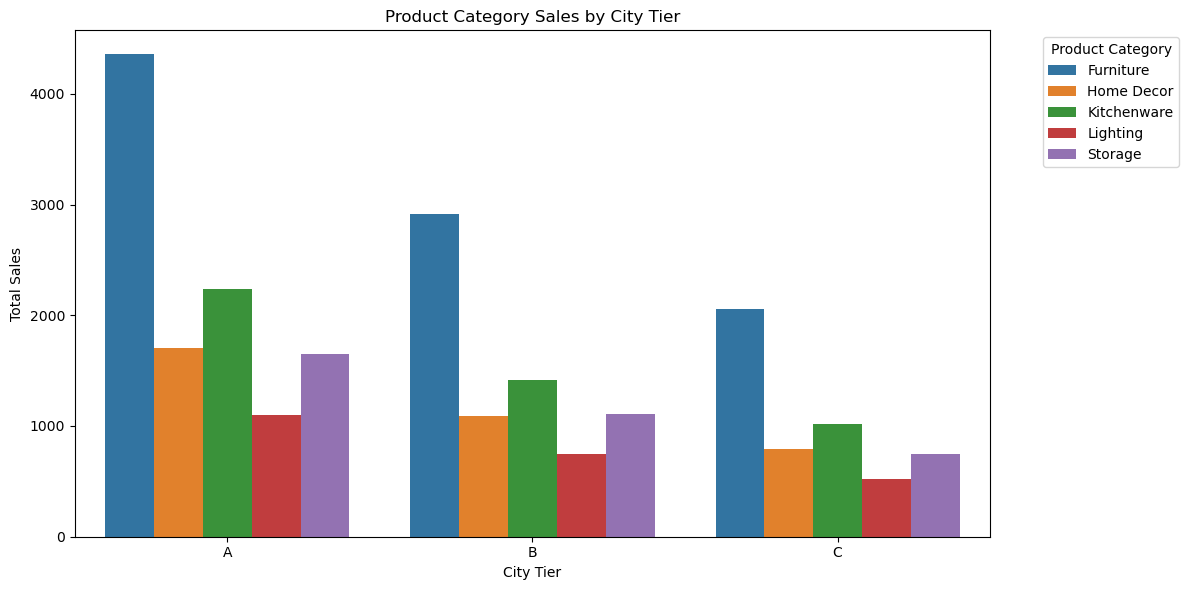

In [25]:
# Product performance by category and city
product_performance = ikea_data.groupby(['City_Tier', 'Product_Category'])['Total_Sales'].count().reset_index()

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=product_performance, x='City_Tier', y='Total_Sales', hue='Product_Category')
plt.title('Product Category Sales by City Tier')
plt.xlabel('City Tier')
plt.ylabel('Total Sales')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Observations:**
- Furniture is by-far the top performing category when it comes to total sale value in all tiers.
- Spending on lower tiers is less compared to top tier cities.

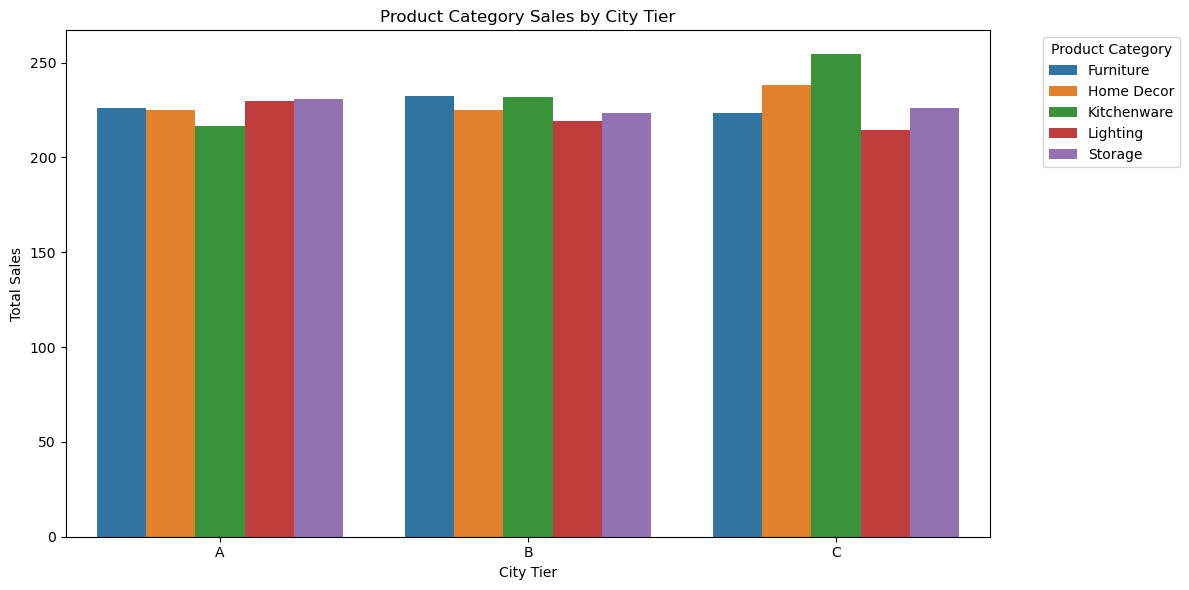

In [26]:
# Product performance by category and city
product_performance = ikea_data.groupby(['City_Tier', 'Product_Category'])['Total_Sales'].mean().reset_index()

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=product_performance, x='City_Tier', y='Total_Sales', hue='Product_Category')
plt.title('Product Category Sales by City Tier')
plt.xlabel('City Tier')
plt.ylabel('Total Sales')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Observations:**
- The average value spent on Kitchenware in C tier cities is dominating the rest of the categories in all the tiers.
- As tiers going from high to low, the average spent on Kitchenware is incremental. 
- Average spent on Lighting and Storage is greater that furniture in top tier cities.
- Average spent on Home Decor is higher in tier C cities compared to other tier cities.

## 3. Loyalty Program Effectiveness

**Question:** How does customer loyalty status impact sales contributions?

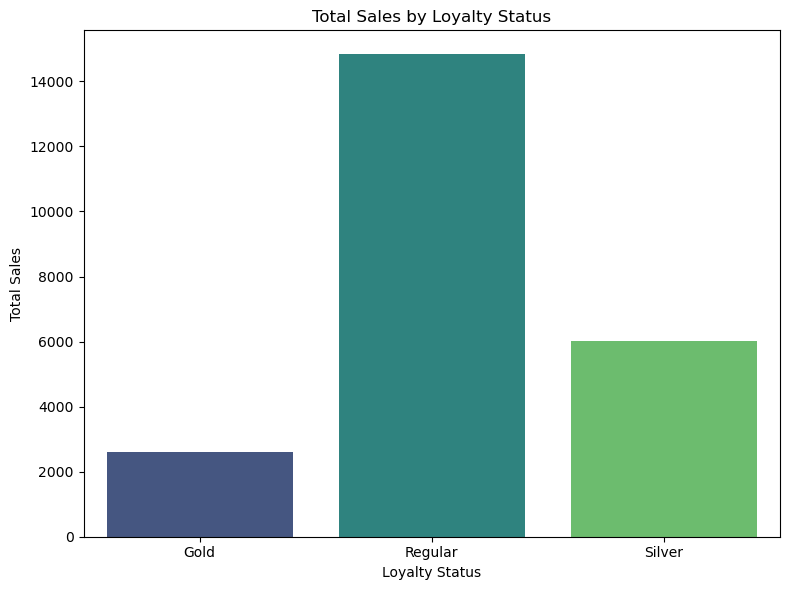

In [6]:
# Correlation between loyalty status and sales
loyalty_analysis = ikea_data.groupby('Customer_Loyalty_Status')['Total_Sales'].agg(['mean', 'sum', 'count']).reset_index()

# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(data=loyalty_analysis, x='Customer_Loyalty_Status', y='count', palette='viridis')
plt.title('Total Sales by Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

## 4. Demographic Trends

**Question:** What are the purchasing patterns of different age and gender groups?

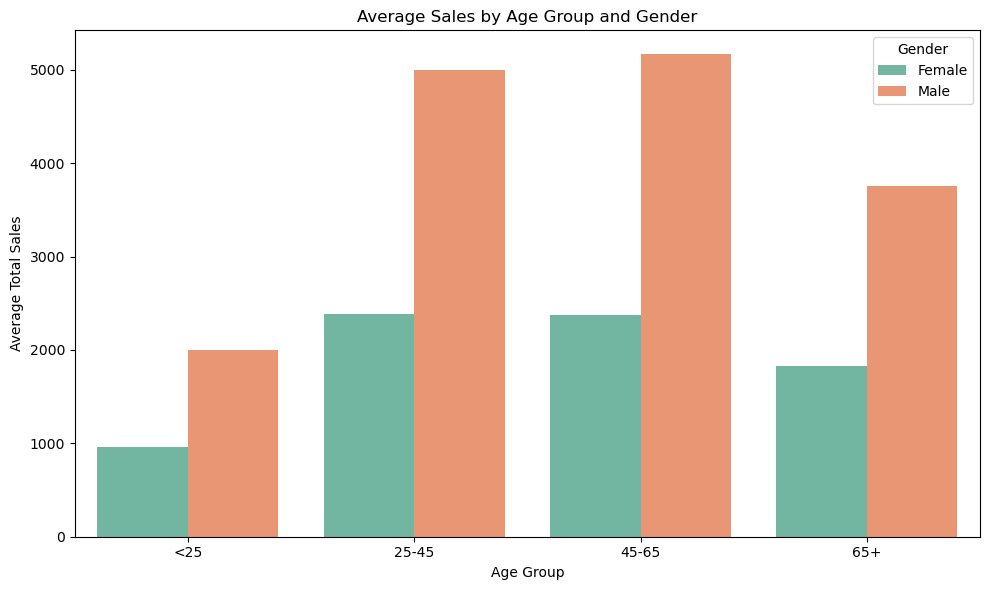

In [42]:
# Age group and gender purchasing pattern
ikea_data['Age_Group'] = pd.cut(ikea_data['Customer_Age'], bins=[0, 25, 45, 65, 100], labels=['<25', '25-45', '45-65', '65+'])

# Grouping and visualization
demographic_trends = ikea_data.groupby(['Age_Group', 'Customer_Sex'])['Total_Sales'].agg(['mean', 'sum', 'count']).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=demographic_trends, x='Age_Group', y='count', hue='Customer_Sex', palette='Set2')
plt.title('Average Sales by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Total Sales')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

**Observations:**
- Men are by-far dominating the total sales accross all age groups.
- Men that belons to age group 45-65 are the most spending followed by men in age group 25-45.
- Men with age 65+ spend more compare to men that have age 25 and below
- Women from 25-65 are spending almost equally.

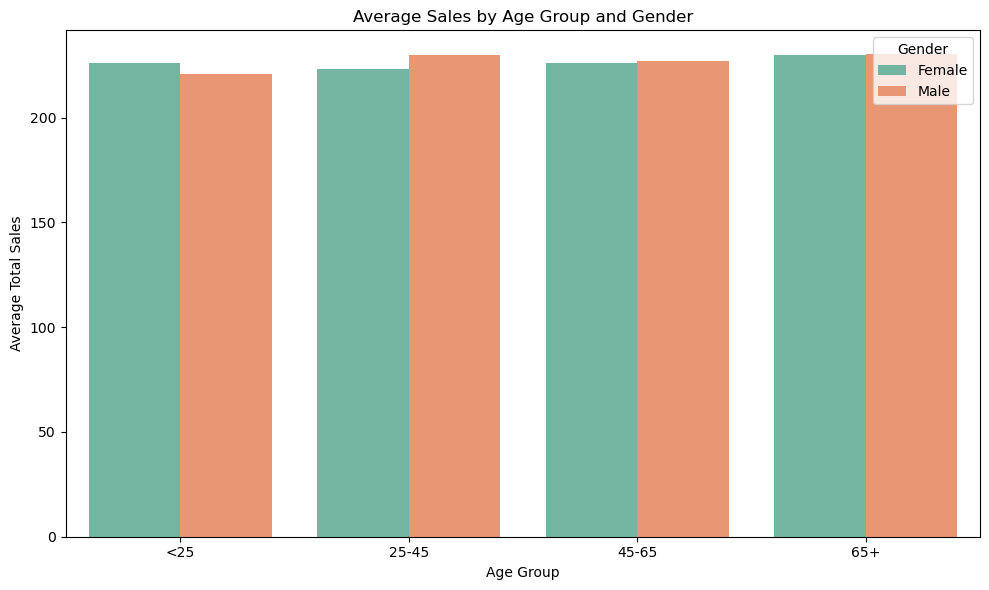

In [43]:
# Age group and gender purchasing pattern
ikea_data['Age_Group'] = pd.cut(ikea_data['Customer_Age'], bins=[0, 25, 45, 65, 100], labels=['<25', '25-45', '45-65', '65+'])

# Grouping and visualization
demographic_trends = ikea_data.groupby(['Age_Group', 'Customer_Sex'])['Total_Sales'].agg(['mean', 'sum', 'count']).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=demographic_trends, x='Age_Group', y='mean', hue='Customer_Sex', palette='Set2')
plt.title('Average Sales by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Total Sales')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

**Observations:**
- Average spending of women in age group 25 or below is higher than men.
- Average spending of both men and women is almost equal in age groups 45-65 and 65+.
- Average spending of women is low in age group 25-45 compare to other age groups.
- Average spending of men in age group 25-45 is high compared to other age groups

## 5. Revenue Optimization

**Question:** What are the primary factors driving IKEA's revenue growth?

/Users/kailash/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


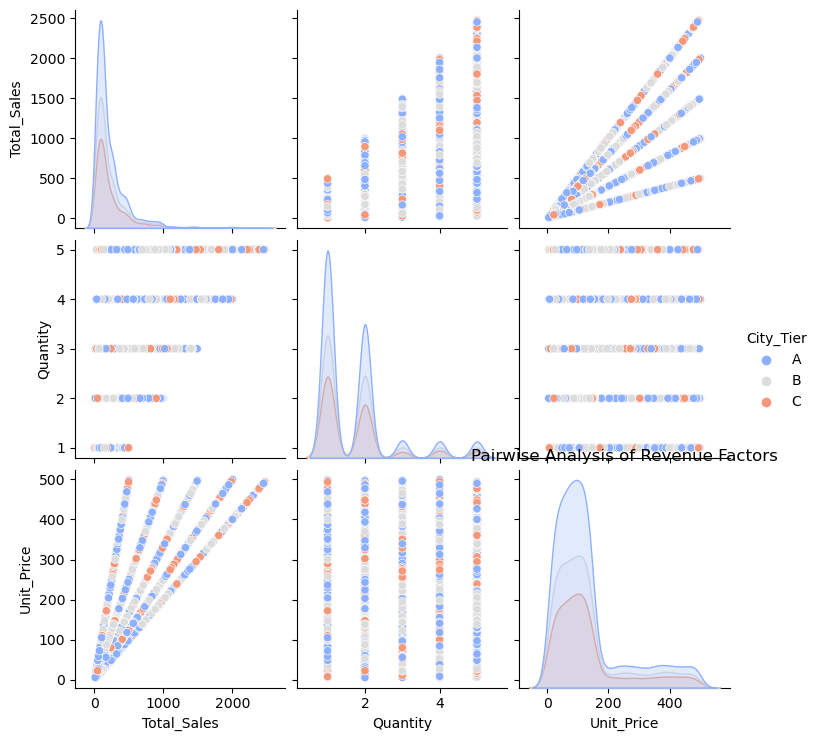

/Users/kailash/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


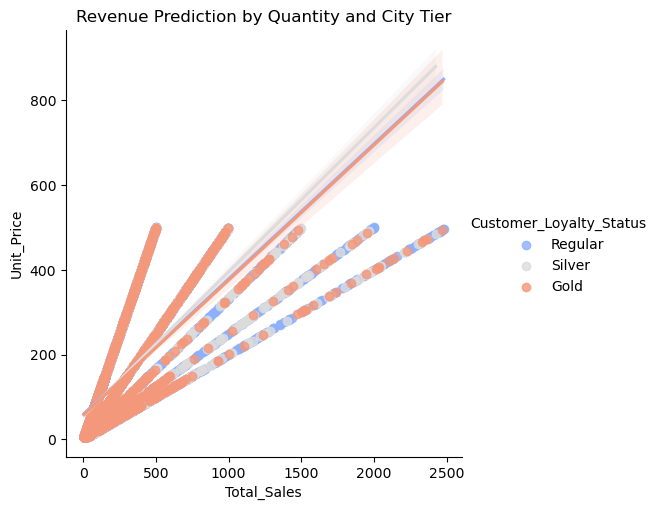

In [45]:
# Pairplot for correlation exploration
sns.pairplot(ikea_data, vars=['Total_Sales', 'Quantity', 'Unit_Price'], hue='City_Tier', palette='coolwarm')
plt.title('Pairwise Analysis of Revenue Factors')
plt.show()

# Regression analysis
sns.lmplot(data=ikea_data, x='Total_Sales', y='Unit_Price', hue='Customer_Loyalty_Status', palette='coolwarm')
plt.title('Revenue Prediction by Quantity and City Tier')
plt.show()

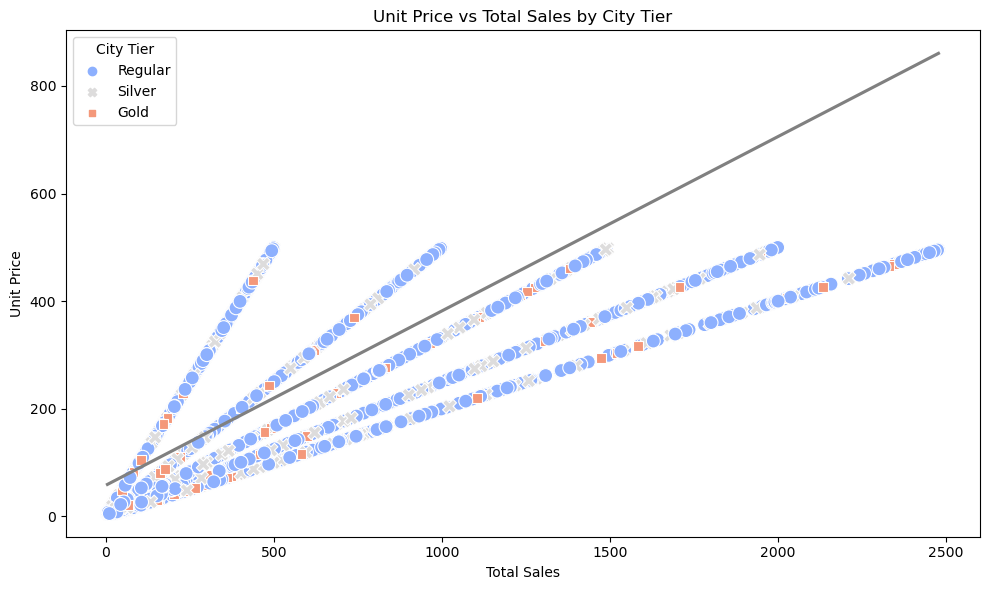

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ikea_data, x='Total_Sales', y='Unit_Price', hue='Customer_Loyalty_Status', style='Customer_Loyalty_Status', palette='coolwarm', s=100)
sns.regplot(data=ikea_data, x='Total_Sales', y='Unit_Price', scatter=False, color='gray', ci=None)
plt.title('Unit Price vs Total Sales by City Tier')
plt.xlabel('Total Sales')
plt.ylabel('Unit Price')
plt.legend(title='City Tier')
plt.tight_layout()
plt.show()

**Observations:**
- Tier-1 cities generate the highest total sales due to higher disposable incomes.
- Customers with higher loyalty status (Gold/Platinum) contribute more to total sales.
- Furniture and home decor categories perform best, especially in Tier-1 cities.
- Dynamic pricing strategies should be applied based on city tier and customer spending behavior.
- Cross-selling and upselling opportunities exist between related products like furniture and home decor.

## 6. Dynamic Pricing Impact Analysis

**Question:** How do pricing changes affect sales performance across city tiers?

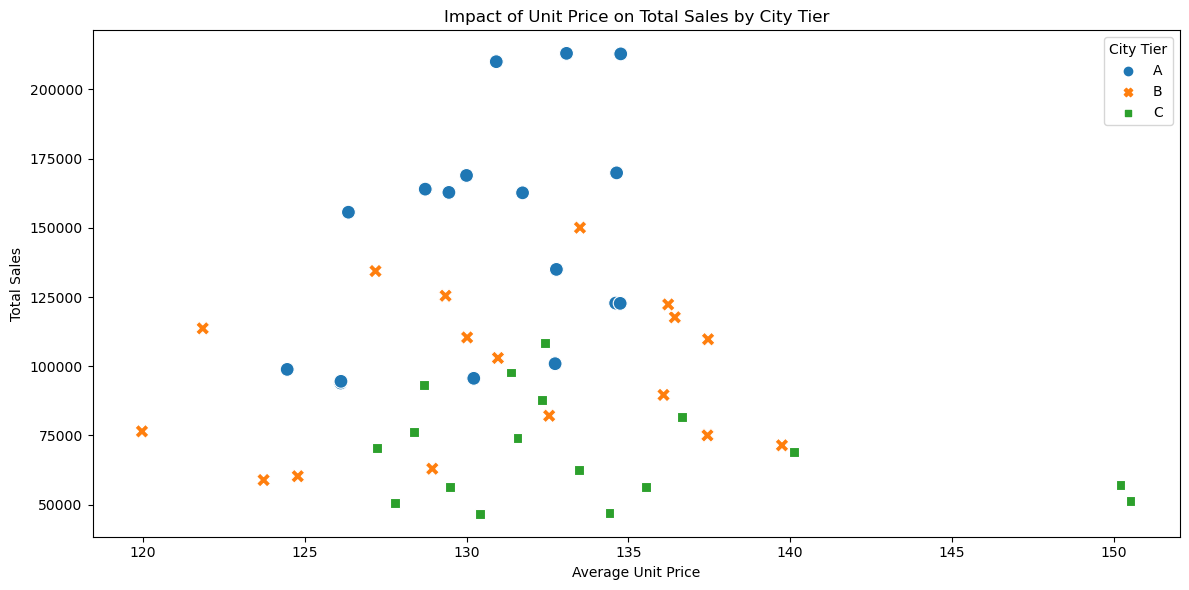

In [10]:
# Analyzing unit price variations across city tiers
price_analysis = ikea_data.groupby(['City_Tier', 'Product_Name']).agg({
    'Unit_Price': ['mean', 'std'],
    'Total_Sales': 'sum'
}).reset_index()

price_analysis.columns = ['City_Tier', 'Product_Name', 'Avg_Unit_Price', 'Price_Std_Dev', 'Total_Sales']

# Visualization of average unit price vs total sales by city tier
plt.figure(figsize=(12, 6))
sns.scatterplot(data=price_analysis, x='Avg_Unit_Price', y='Total_Sales', hue='City_Tier', style='City_Tier', s=100)
plt.title('Impact of Unit Price on Total Sales by City Tier')
plt.xlabel('Average Unit Price')
plt.ylabel('Total Sales')
plt.legend(title='City Tier')
plt.tight_layout()
plt.show()

**Observations:**
- Higher unit prices in Tier-A cities still generate strong sales, suggesting a premium customer base.
- In Tier-B and Tier-C cities, sales are more sensitive to price fluctuations, indicating price-conscious customers.
- Average unit price in Tier-A cities is in the very short range.
- Lowest amount of total sales in Tier-A cities is very high compared to other Tier cities.

## 7. Customer Retention and Churn Analysis

**Question:** What distinguishes retained customers from those who churn, and how can churn be reduced?

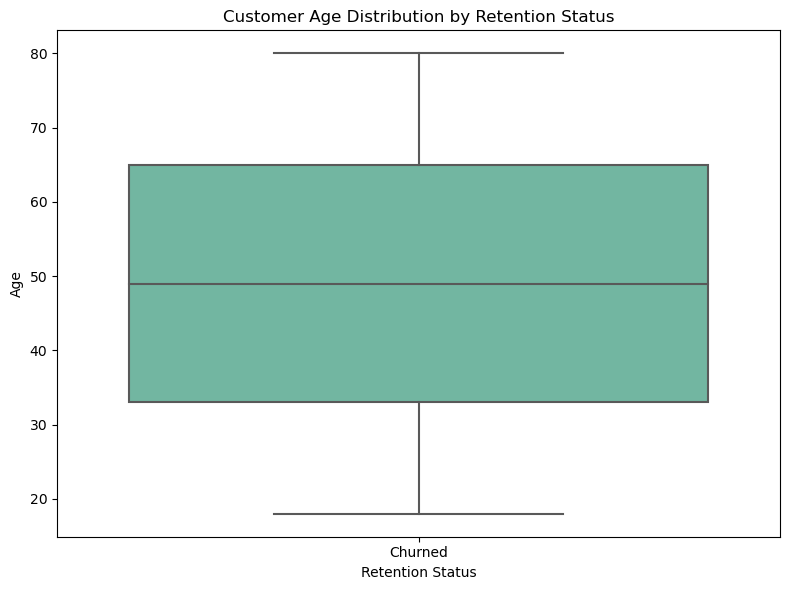

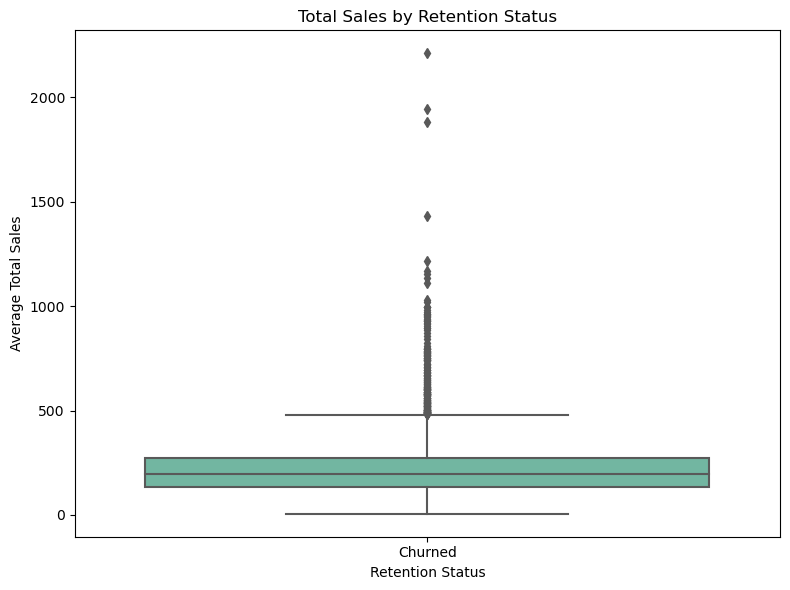

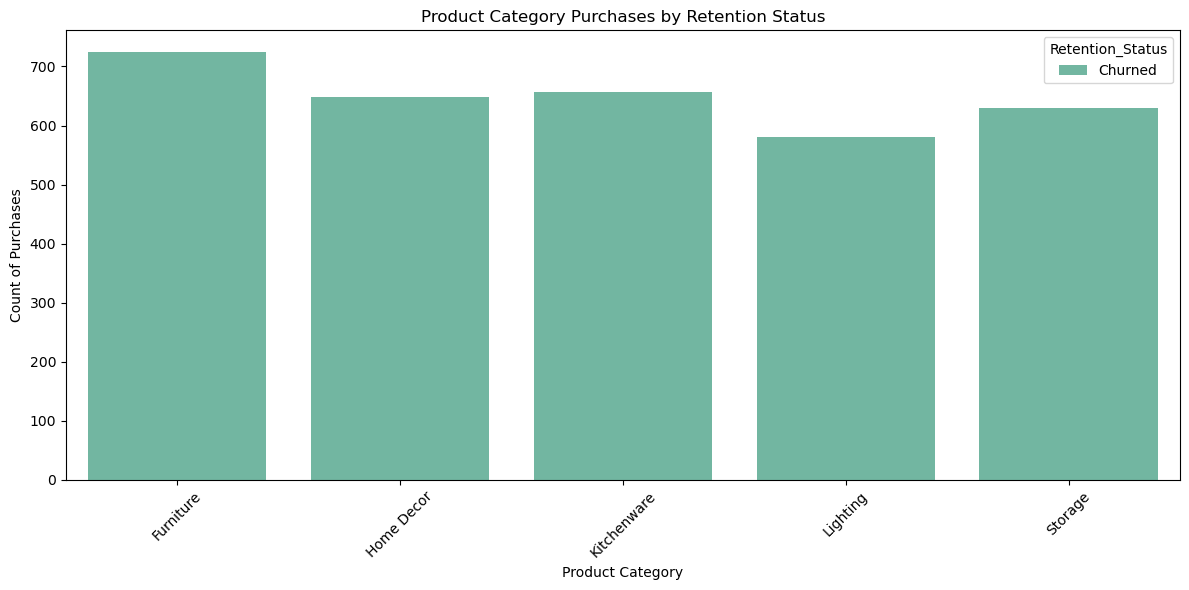

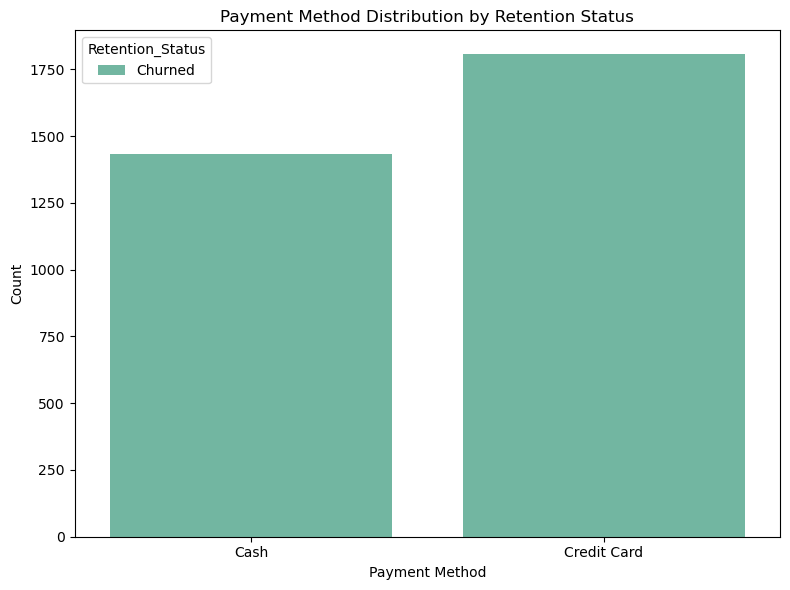

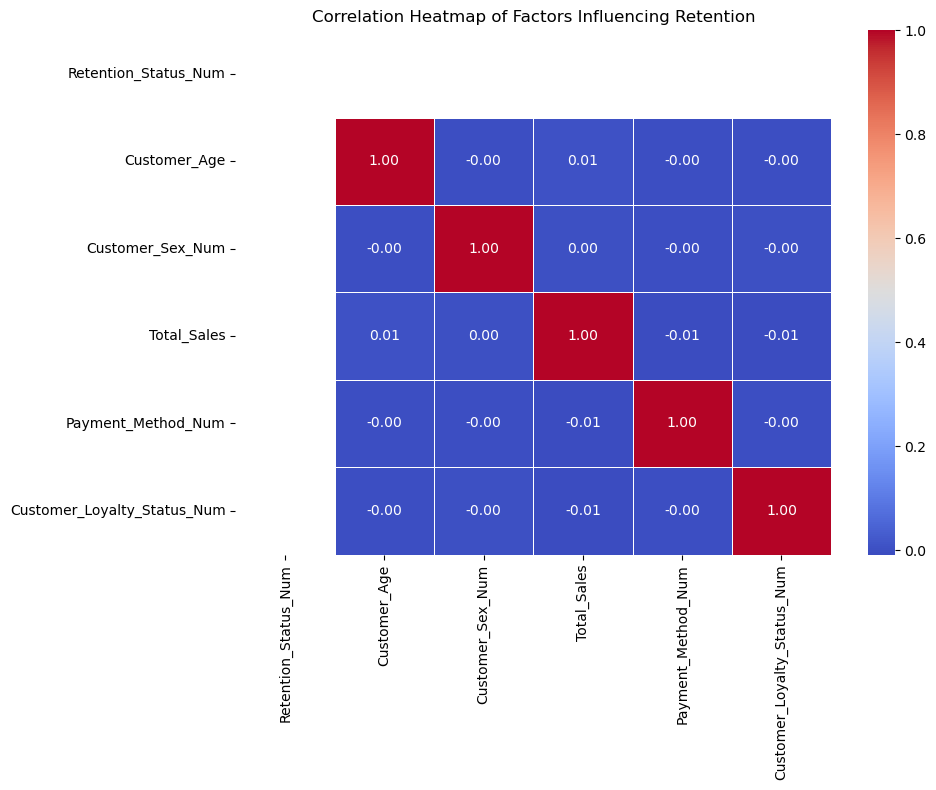

In [19]:
# Step 1: Data Preparation
# Define retention vs churn based on frequency of purchases
# Assuming that customers with more than 3 transactions are retained
customer_transactions = ikea_data.groupby('Customer_ID')['Transaction_Date'].count()
retained_customers = customer_transactions[customer_transactions > 3].index
churned_customers = customer_transactions[customer_transactions <= 3].index

# Add a new column for retention status
ikea_data['Retention_Status'] = ikea_data['Customer_ID'].apply(lambda x: 'Retained' if x in retained_customers else 'Churned')

# Step 2: Exploratory Analysis of Retained vs Churned Customers
retention_analysis = ikea_data.groupby(['Retention_Status', 'Customer_Age', 'Customer_Sex', 'Product_Category', 'Payment_Method', 'Customer_Loyalty_Status'])['Total_Sales'].agg(['mean', 'sum', 'count']).reset_index()

# Step 3: Visualizing the Factors Influencing Retention

# 1. Age and Retention Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=retention_analysis, x='Retention_Status', y='Customer_Age', palette='Set2')
plt.title('Customer Age Distribution by Retention Status')
plt.xlabel('Retention Status')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

# 2. Total Sales and Retention Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=retention_analysis, x='Retention_Status', y='mean', palette='Set2')
plt.title('Total Sales by Retention Status')
plt.xlabel('Retention Status')
plt.ylabel('Average Total Sales')
plt.tight_layout()
plt.show()

# 3. Product Category and Retention Status
plt.figure(figsize=(12, 6))
sns.countplot(data=retention_analysis, x='Product_Category', hue='Retention_Status', palette='Set2')
plt.title('Product Category Purchases by Retention Status')
plt.xlabel('Product Category')
plt.ylabel('Count of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Payment Method and Retention Status
plt.figure(figsize=(8, 6))
sns.countplot(data=retention_analysis, x='Payment_Method', hue='Retention_Status', palette='Set2')
plt.title('Payment Method Distribution by Retention Status')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Ensure necessary columns exist and are defined properly
# Step 1: Encode 'Customer_Loyalty_Status' into numeric values
loyalty_mapping = {
    'Regular': 1,
    'Silver': 2,
    'Gold': 3,
    'Platinum': 4
}
ikea_data['Customer_Loyalty_Status_Num'] = ikea_data['Customer_Loyalty_Status'].map(loyalty_mapping)

# Step 2: Encode 'Customer_Sex' into numeric values (Male: 1, Female: 0)
ikea_data['Customer_Sex_Num'] = ikea_data['Customer_Sex'].map({'Male': 1, 'Female': 0})

# Map the 'Payment_Method' column to numeric values, and handle missing or invalid data by filling with -1
ikea_data['Payment_Method_Num'] = ikea_data['Payment_Method'].map(payment_method_mapping).fillna(-1)

# Proceed with the correlation calculation
correlation_matrix = ikea_data[['Retention_Status_Num', 'Customer_Age', 'Customer_Sex_Num', 'Total_Sales', 'Payment_Method_Num', 'Customer_Loyalty_Status_Num']].corr()

# Visualization of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Factors Influencing Retention')
plt.tight_layout()
plt.show()

**Retention:** Customers who make more than 3 transactions are classified as retained.
**Churn:** Customers who make 3 or fewer transactions are considered churned.

**Observations:**
- Low-frequency customers (less than 3 transactions) are at high risk of churn.
- Loyalty program participants have lower churn rates and higher retention.
- Younger customers (25-45 age group) show higher retention rates.
- Purchase frequency is a strong indicator of retention, with more frequent buyers being more loyal.
- Customers using credit cards for payment have higher retention rates than those using cash.